## **Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pingouin as pg
from sklearn.covariance import MinCovDet
from scipy.stats import chi2
from prince import FAMD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## **Import Dataset**

In [2]:
dataset=pd.read_csv("C:/UOC pdf/4th Year/Machine Learning-02/Data-Analysis-1/data/me_cfs_vs_depression_dataset.csv")

In [3]:
dataset.head() ##preview top five data records

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,NaN,24.0,1.6,13.0,6.9,0,Partially working,NaN,Rarely,Yes,Depression
3,32,Female,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,Not working,Low,Rarely,No,Both


In [4]:
dataset.shape ###shape of the dataset

(1000, 16)

In [5]:
dataset.info() ##overoll information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1000 non-null   int64  
 1   gender                        1000 non-null   object 
 2   sleep_quality_index           953 non-null    float64
 3   brain_fog_level               952 non-null    float64
 4   physical_pain_score           966 non-null    float64
 5   stress_level                  952 non-null    float64
 6   depression_phq9_score         978 non-null    float64
 7   fatigue_severity_scale_score  979 non-null    float64
 8   pem_duration_hours            976 non-null    float64
 9   hours_of_sleep_per_night      979 non-null    float64
 10  pem_present                   1000 non-null   int64  
 11  work_status                   953 non-null    object 
 12  social_activity_level         960 non-null    object 
 13  exer

## **Change the data type of pem_present variable**

In [6]:
dataset["pem_present"] = dataset["pem_present"].map({0:"No", 1: "Yes"})

In [7]:
dataset.describe()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night
count,1000.000000,953.000000,952.000000,966.000000,952.000000,978.000000,979.000000,976.000000,979.000000
mean,44.385000,5.468625,5.611765,5.521843,5.459139,12.268916,6.407252,23.105533,6.571297
std,15.321669,2.571423,2.649316,2.565460,2.566536,6.306588,2.206937,13.823953,2.040320
min,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000
25%,31.750000,3.100000,3.300000,3.325000,3.300000,9.000000,6.300000,11.000000,4.800000
50%,45.000000,5.600000,5.800000,5.600000,5.400000,10.000000,7.000000,23.000000,6.600000
75%,57.000000,7.700000,7.900000,7.800000,7.700000,16.000000,7.500000,35.000000,8.350000
max,70.000000,10.000000,10.000000,10.000000,10.000000,27.000000,10.000000,47.000000,10.000000


## **Check Missing values**

In [8]:
dataset.isnull().sum() ##Exist the missing values

age                              0
gender                           0
sleep_quality_index             47
brain_fog_level                 48
physical_pain_score             34
stress_level                    48
depression_phq9_score           22
fatigue_severity_scale_score    21
pem_duration_hours              24
hours_of_sleep_per_night        21
pem_present                      0
work_status                     47
social_activity_level           40
exercise_frequency              39
meditation_or_mindfulness       11
diagnosis                        0
dtype: int64

##### **All the variables have <5% missing**

#### **Visualizing Missingness Patterns**

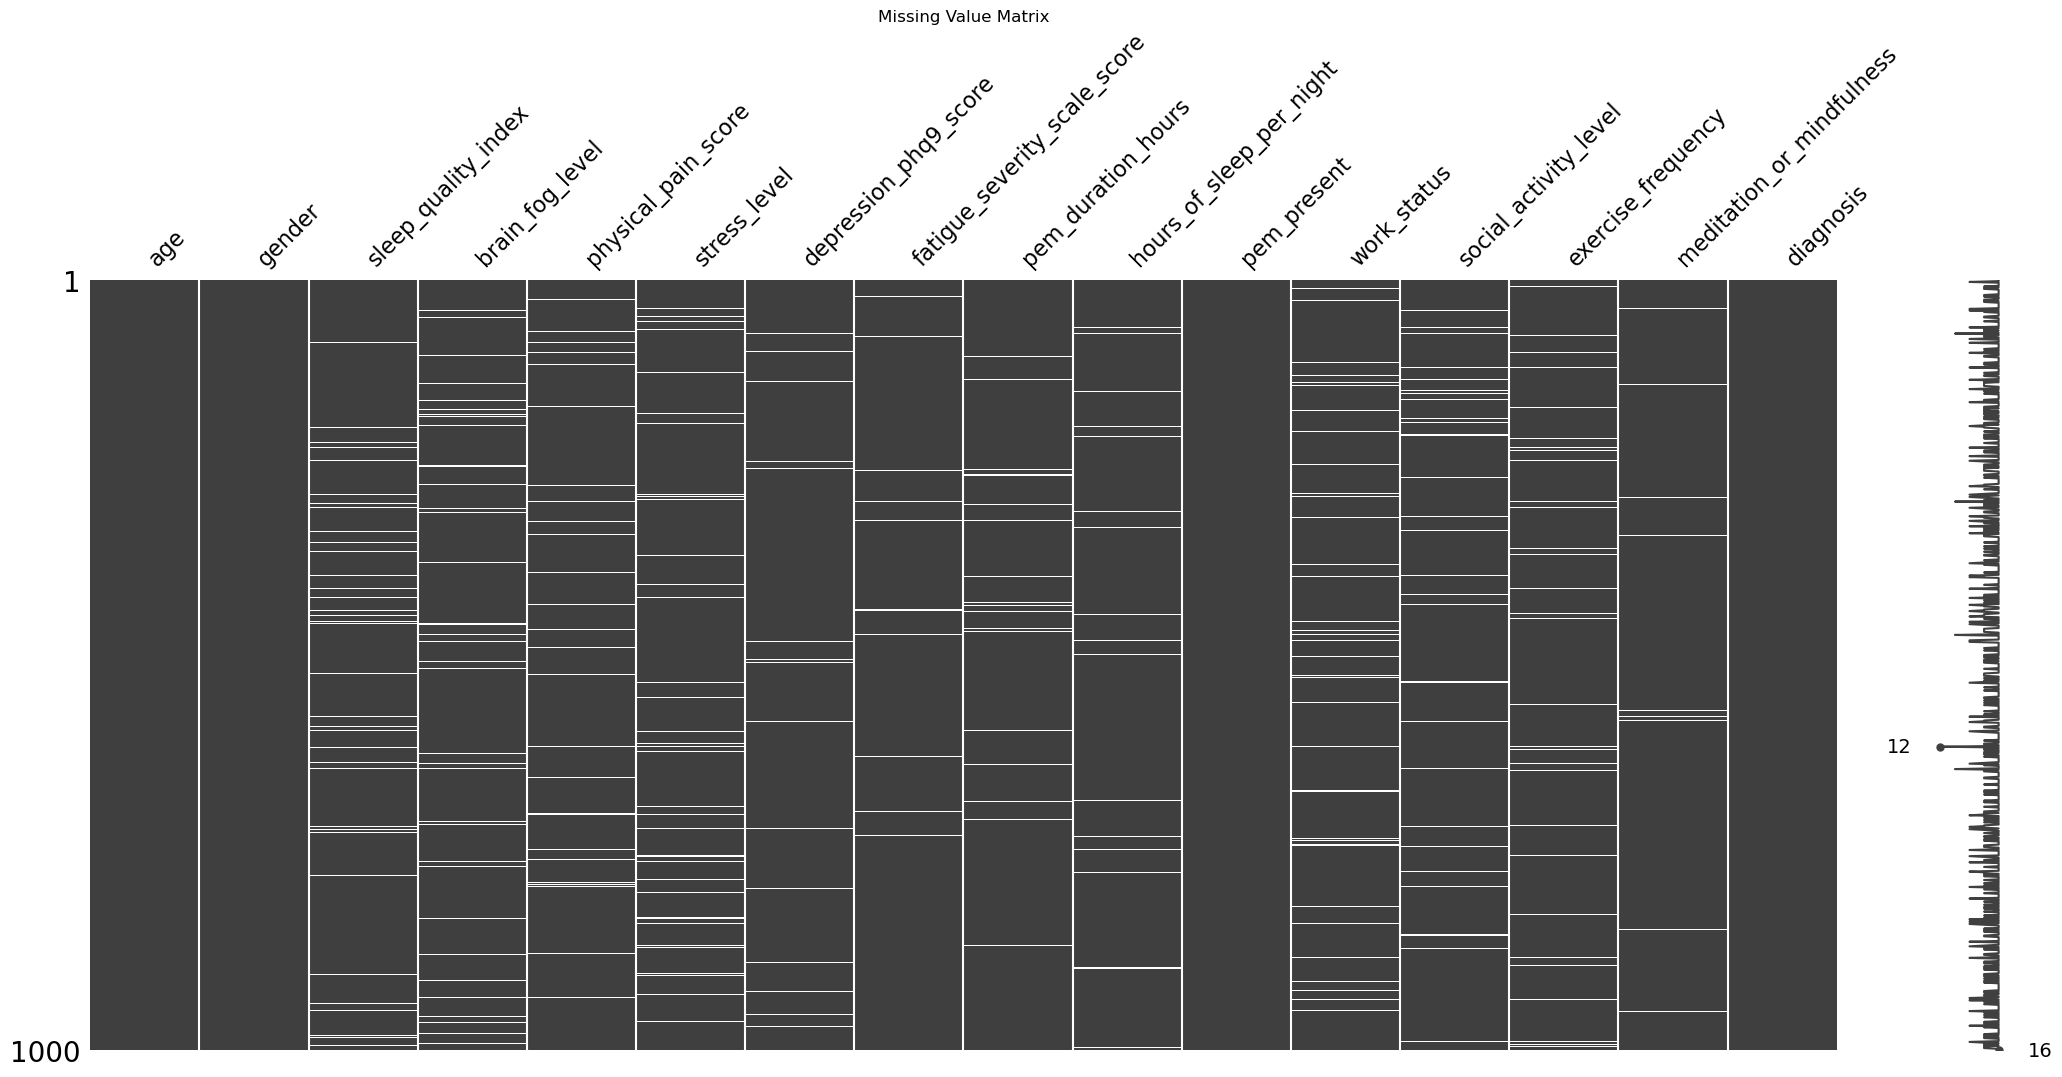

In [9]:
# Matrix plot
msno.matrix(dataset)
plt.title("Missing Value Matrix")
plt.show()

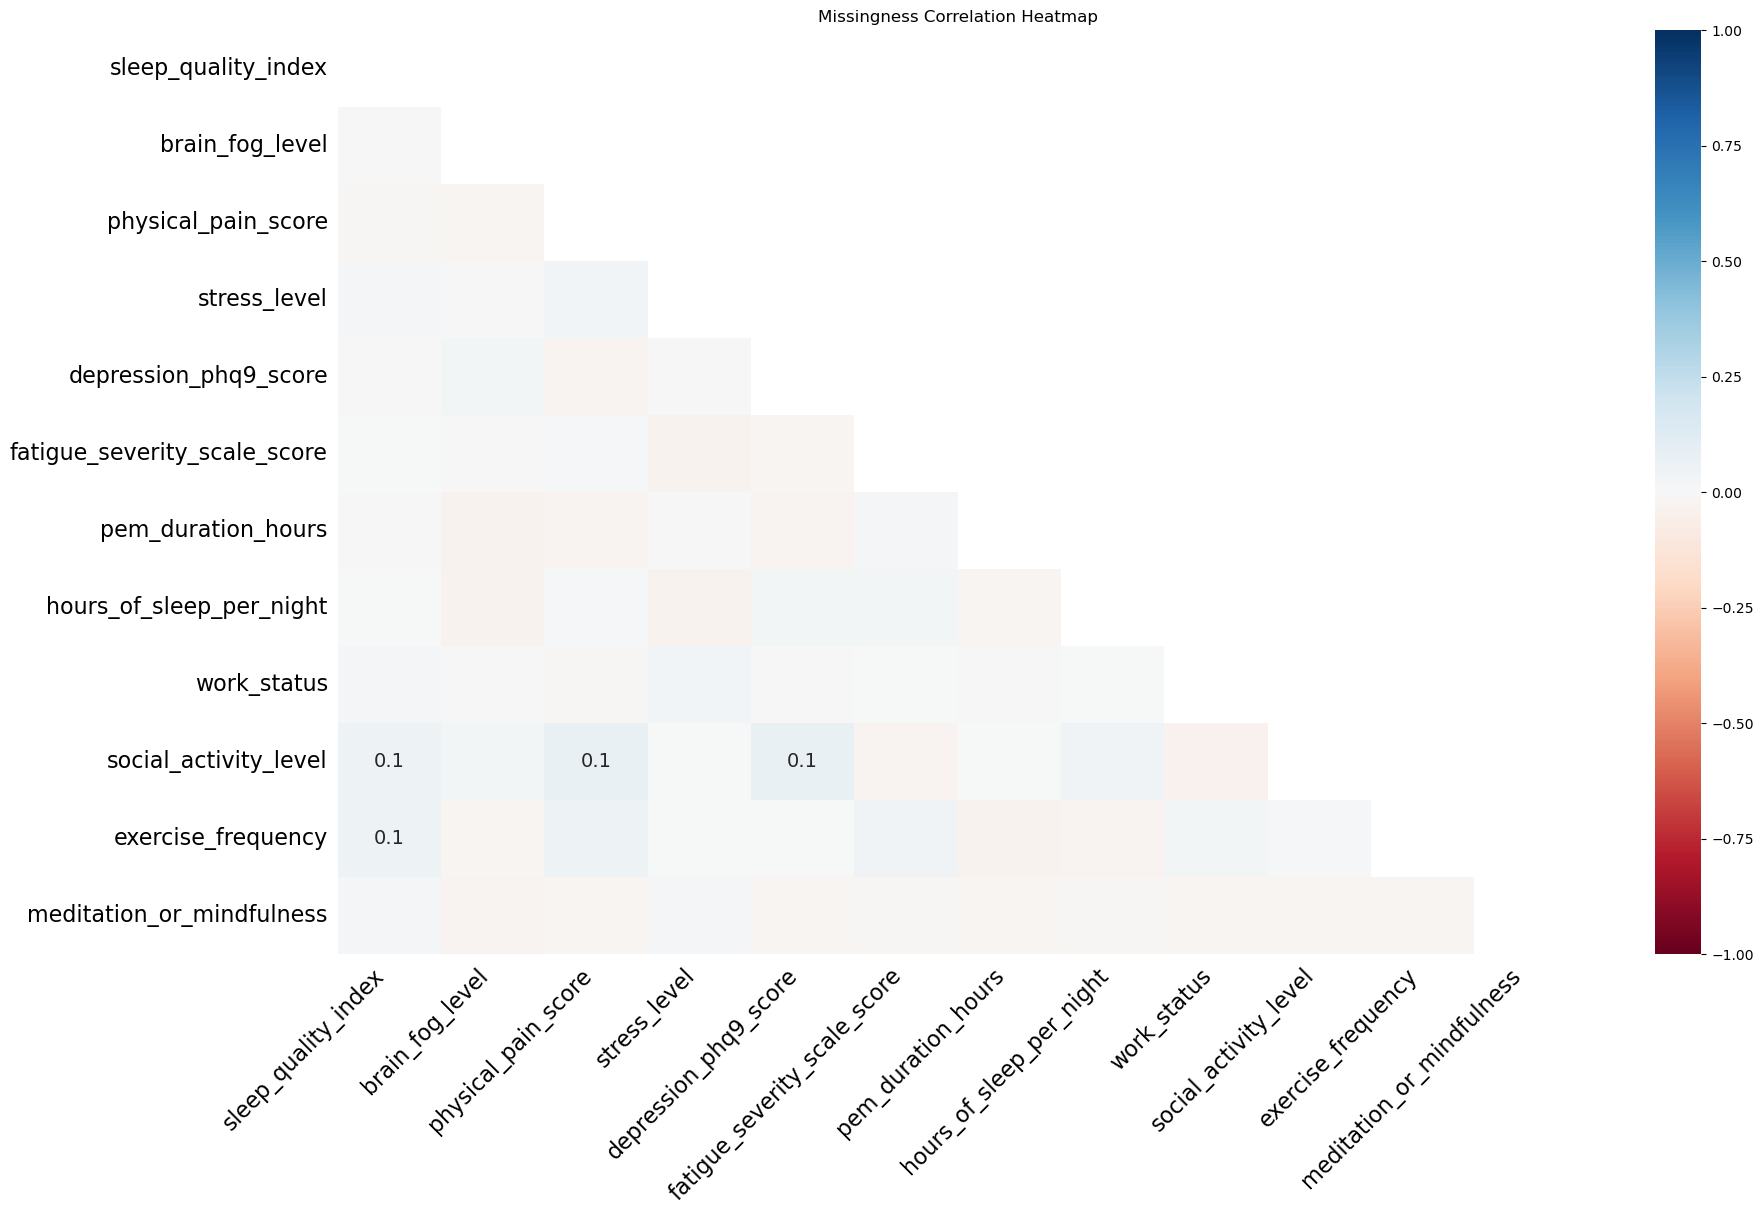

In [10]:
# Heatmap to see if missingness in columns is correlated
msno.heatmap(dataset)
plt.title("Missingness Correlation Heatmap")
plt.show()

In [11]:
##### Missing data is fairly low and spread out.
##### The missingness across variables is not strongly related.This suggests that the missing values are likely independent.
##### So, we can safely proceed with imputation

## **Duplicate Records**

In [11]:
dataset.duplicated().sum() ##No duplicate records

0

## **Split the Dataset into Training and Testing**

In [12]:
X=dataset.drop(columns=['diagnosis'],axis=1) ## get the predictor variables
Y=dataset['diagnosis'] ## get the response variable

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42) ##divide the dataset into training and testing 

In [14]:
print(f"Shape of the Training set:{X_train.shape,Y_train.shape}")
print(f"Shape of  the Testgin set:{X_test.shape,Y_test.shape}")

Shape of the Training set:((700, 15), (700,))
Shape of  the Testgin set:((300, 15), (300,))


## **Optional**

In [15]:
for col in X_train.select_dtypes(include=["object","category"]).columns:
    print(X_train[col].value_counts())
    print()

gender
Male      366
Female    334
Name: count, dtype: int64

pem_present
Yes    424
No     276
Name: count, dtype: int64

work_status
Partially working    237
Working              225
Not working          207
Name: count, dtype: int64

social_activity_level
Low          142
Very low     142
High         139
Very high    129
Medium       123
Name: count, dtype: int64

exercise_frequency
Rarely       156
Often        147
Daily        136
Sometimes    121
Never        112
Name: count, dtype: int64

meditation_or_mindfulness
No     351
Yes    342
Name: count, dtype: int64



## **Impute Missing Values using MICE Imputer**

In [16]:
## Filter categorical and numberical variables seperately
cat_cols=X_train.select_dtypes(include=["object","category"]).columns
num_cols=X_train.select_dtypes(include=["number"]).columns

In [19]:
## define the numerical pipeline
numerical_pipeline=Pipeline(steps=[
    ("Numiercal Impuation",IterativeImputer(estimator=RandomForestRegressor(random_state=42),max_iter=10,random_state=0))
])

## define the ordinal pipeline
ordinal_pipline=Pipeline(steps=[
    ("Ordinal Columns",OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1)),
    ("Ordinal Imputation",IterativeImputer(estimator=RandomForestClassifier(random_state=42),max_iter=10,random_state=0))
])

## Combine the pipelines
preprocessor=ColumnTransformer(transformers=[
    ("Numiercal Preprocessor",numerical_pipeline,num_cols),
    ("Ordinal Preprocessor",ordinal_pipline,cat_cols),
],
   remainder="passthrough",
   n_jobs=-1
)

In [20]:
## Execute the pipeline
X_train_imputed=preprocessor.fit_transform(X_train)

In [21]:
X_train_imputed=pd.DataFrame(X_train_imputed,columns=num_cols.append(cat_cols)) ## Assign the column names to the imputed dataset

## **Optional**

In [23]:
for col in cat_cols:
    print(X_train_imputed[col].value_counts())
    print()

gender
1.0    366
0.0    334
Name: count, dtype: int64

pem_present
1.0    424
0.0    276
Name: count, dtype: int64

work_status
1.0    250
2.0    238
0.0    212
Name: count, dtype: int64

social_activity_level
4.0    149
1.0    147
0.0    143
3.0    133
2.0    128
Name: count, dtype: int64

exercise_frequency
3.0    162
2.0    155
0.0    142
4.0    124
1.0    117
Name: count, dtype: int64

meditation_or_mindfulness
0.0    352
1.0    348
Name: count, dtype: int64



In [24]:
X_test_imputed=preprocessor.transform(X_test) ##impuate the test set using train set

In [25]:
X_test_imputed=pd.DataFrame(X_test_imputed,columns=num_cols.append(cat_cols)) ## Assign the column names to the imputed dataset

## **After Impute the Training and Testing set**

In [28]:
X_train_imputed.isnull().sum()

age                             0
sleep_quality_index             0
brain_fog_level                 0
physical_pain_score             0
stress_level                    0
depression_phq9_score           0
fatigue_severity_scale_score    0
pem_duration_hours              0
hours_of_sleep_per_night        0
gender                          0
pem_present                     0
work_status                     0
social_activity_level           0
exercise_frequency              0
meditation_or_mindfulness       0
dtype: int64

In [29]:
X_test_imputed.isnull().sum()

age                             0
sleep_quality_index             0
brain_fog_level                 0
physical_pain_score             0
stress_level                    0
depression_phq9_score           0
fatigue_severity_scale_score    0
pem_duration_hours              0
hours_of_sleep_per_night        0
gender                          0
pem_present                     0
work_status                     0
social_activity_level           0
exercise_frequency              0
meditation_or_mindfulness       0
dtype: int64

In [30]:
print(f"Shape of the Imputed Training set:{X_train_imputed.shape,Y_train.shape}")
print(f"Shape of  the Imputed Testgin set:{X_test_imputed.shape,Y_test.shape}")

Shape of the Imputed Training set:((700, 15), (700,))
Shape of  the Imputed Testgin set:((300, 15), (300,))


In [31]:
##### Each categorical variables in training and testing set replace with original categories

## 1.Gender 
# Replace 0.0 with 'Female', 1.0 with 'Male'
X_train_imputed["gender"] = X_train_imputed["gender"].map({0.0: "Female", 1.0: "Male"})
X_test_imputed["gender"] = X_test_imputed["gender"].map({0.0:"Female", 1.0: "Male"})

## 2.Pem_present(PEM)/Post-Exertional Malaise
# Replace 0.0 with 'No', 1.0 with 'Yes'
X_train_imputed["pem_present"] = X_train_imputed["pem_present"].map({0: "No", 1: "Yes"})
X_test_imputed["pem_present"] = X_test_imputed["pem_present"].map({0: "No", 1: "Yes"})

## 3. Social Activity Level 
# Replace 0.0 with 'High', 1.0 with 'Low', 2.0 with 'Medium', 3.0 with 'Very high',4.0 with 'Very low'
X_train_imputed["social_activity_level"] = X_train_imputed["social_activity_level"].map({0.0:"High", 1.0:"Low",2.0:"Medium",3.0:"Very high",4.0:"Very low"})
X_test_imputed["social_activity_level"] = X_test_imputed["social_activity_level"].map({0.0:"High", 1.0:"Low",2.0:"Medium",3.0:"Very high",4.0:"Very low"})

## 4. Work Status
# Replace 0.0 with 'Not working', 1.0 with 'Partialy working',2.0 with 'Working'
X_train_imputed["work_status"] = X_train_imputed["work_status"].map({0:"Not working", 1:"Partialy working",2.0:"Working"})
X_test_imputed["work_status"] = X_test_imputed["work_status"].map({0:"Not working", 1:"Partialy working",2.0:"Working"})

## 5. Exercise Frequency	
# Replace 0.0 with 'Daily', 1.0 with 'Never', 2.0 with 'Often', 3.0 with 'Rarely',4.0 with 'Sometimes'
X_train_imputed["exercise_frequency"] = X_train_imputed["exercise_frequency"].map({0:"Daily", 1:"Never",2.0:"Often",3.0:"Rarely",4.0:"Sometimes"})
X_test_imputed["exercise_frequency"] = X_test_imputed["exercise_frequency"].map({0:"Daily", 1:"Never",2.0:"Often",3.0:"Rarely",4.0:"Sometimes"})

## 6. Meditation or Mindfulness
# Replace 0.0 with 'No', 1.0 with 'Yes'
X_train_imputed["meditation_or_mindfulness"] = X_train_imputed["meditation_or_mindfulness"].map({0.0: "No", 1.0: "Yes"})
X_test_imputed["meditation_or_mindfulness"] = X_test_imputed["meditation_or_mindfulness"].map({0.0:"No", 1.0: "Yes"})

################################################################################################################################

## **Check Univariate Outliers**

In [32]:
def outliers(var):
    q1=np.quantile(var,0.25)
    q3=np.quantile(var,0.75)
    IQR=q3-q1
    
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR

    count=sum(var<lower_bound)|sum(var>upper_bound)
    return count

In [33]:
num_cols=X_train_imputed.select_dtypes(include="number").columns ## drop pem_present variable

In [34]:
for col in num_cols:
    outlier_count=outliers(X_train_imputed[col])
    print(f"{col}---->{outlier_count}")

age---->0
sleep_quality_index---->0
brain_fog_level---->0
physical_pain_score---->0
stress_level---->0
depression_phq9_score---->46
fatigue_severity_scale_score---->127
pem_duration_hours---->0
hours_of_sleep_per_night---->0


## **Objectives**

#### **1.Build a machine learning model to classify whether a person has ME/CFS or Depression using available data.**
#### **2.Find out which symptoms, survey answers, or personal details (like age or gender) are most helpful in** 
#### **telling the two conditions apart.**
#### **3.Use Explainable AI tools (SHAP or LIME ) to understand why the model makes certain predictions,** 
#### **so doctors and researchers can trust and use it.**

## **EDA**

In [35]:
## merge Y_train and X_train_impute for EDA part
train_data = pd.concat([Y_train.reset_index(drop=True), pd.DataFrame(X_train_imputed)], axis=1)

#### **Univariate Analysis**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6992\602144531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="diagnosis",y="count",data=diagnosis_gourp,kind="bar",palette=["#4C72B0","#8172B3","#E39C4C"])


Text(0.5, 1.0, 'Frequency of Diagnosis')

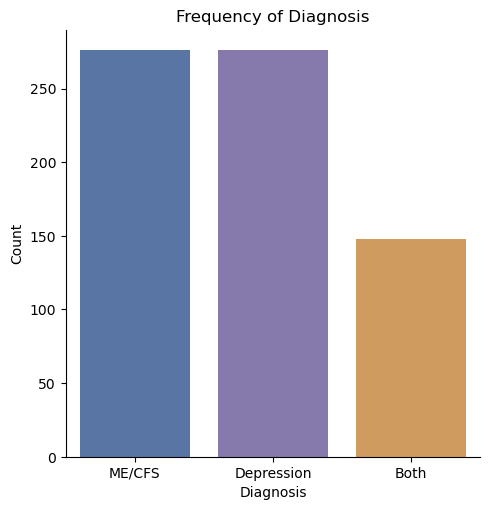

In [36]:
## Distribution of target variable
diagnosis_gourp=Y_train.value_counts().reset_index()

sns.catplot(x="diagnosis",y="count",data=diagnosis_gourp,kind="bar",palette=["#4C72B0","#8172B3","#E39C4C"])
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Frequency of Diagnosis")

In [37]:
diagnosis_gourp

,diagnosis,count
0,ME/CFS,276
1,Depression,276
2,Both,148


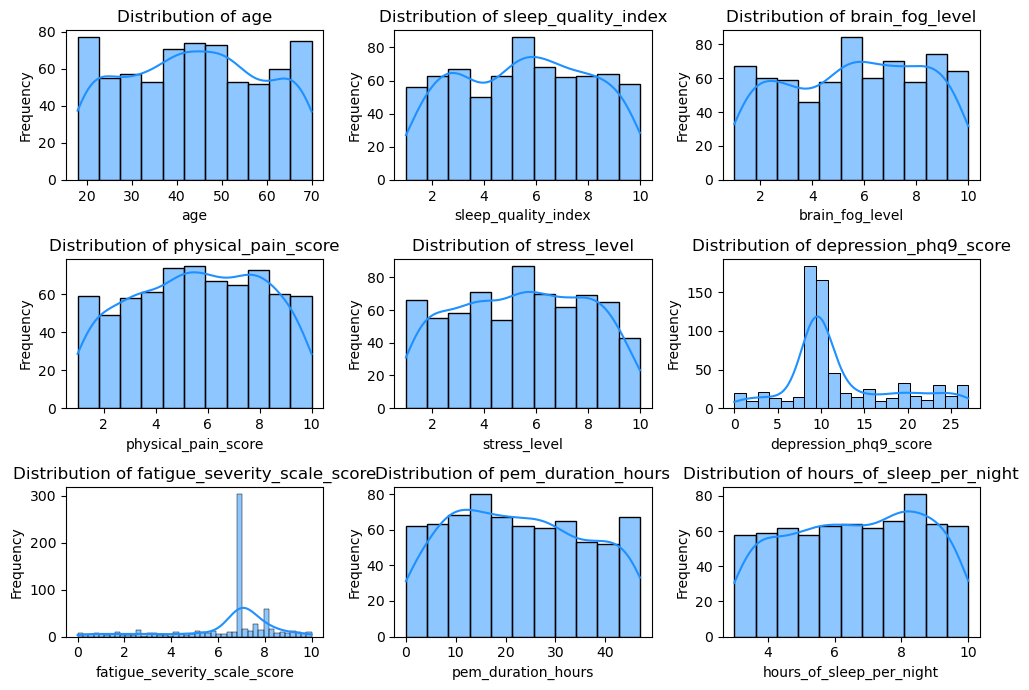

In [38]:
## Histhogram of of all numerical variables
fig,axes=plt.subplots(3,3,figsize=(10,7))
temp=0
for row in range(3):
    for col in range(3):
        var=num_cols[temp]
        sns.histplot(x=var,data=X_train_imputed,kde=True,color="dodgerblue",ax=axes[row][col])
        axes[row][col].set_title(f"Distribution of {var}")
        axes[row][col].set_xlabel(f"{var}")
        axes[row][col].set_ylabel("Frequency")
        temp=temp+1 


plt.tight_layout()
plt.show()

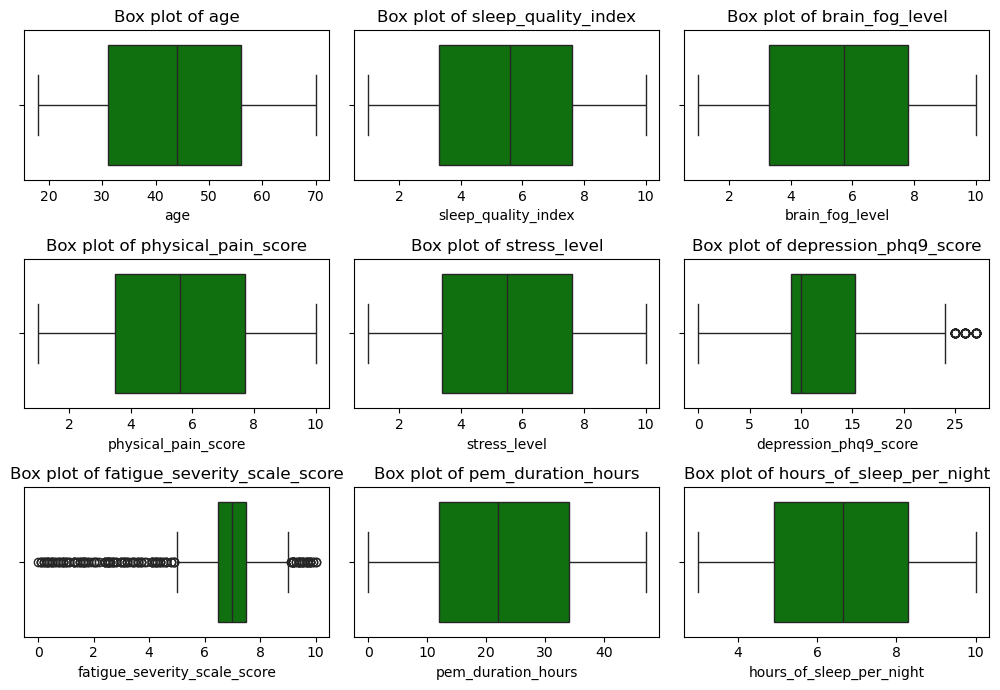

In [39]:
## Box plot of all numerical variables
fig,axes=plt.subplots(3,3,figsize=(10,7))
temp=0
for row in range(3):
    for col in range(3):
        var=num_cols[temp]
        sns.boxplot(x=var,data=X_train_imputed,color="green",ax=axes[row][col])
        axes[row][col].set_title(f"Box plot of {var}")
        axes[row][col].set_xlabel(f"{var}")
        temp=temp+1 


plt.tight_layout()
plt.show()


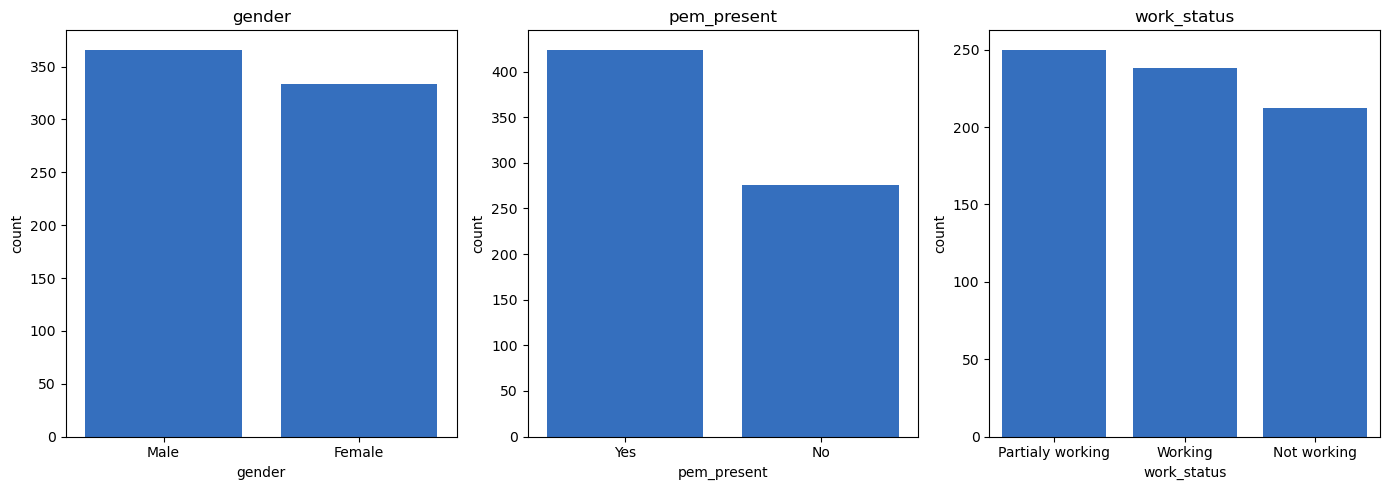

In [40]:
## Bar chart for categorical variables
fig,axes=plt.subplots(1,3,figsize=(14,5))

for i,var in enumerate(cat_cols[:3]):
    counts=X_train_imputed[var].value_counts().reset_index()
    counts.columns=[var,'count']
    sns.barplot(y='count',x=var,color="#1e6cd5",data=counts,ax=axes[i])
    axes[i].set_title(var)

plt.tight_layout()
plt.show()


#### Female--->0  and Male--->1 for Gender
#### Not Working--->0 , Partialy Working--->1 and Working---->2 for Work Status
#### very low--->4,low--->1,medium--->2,high--->0 and very high--->3 for social activity level

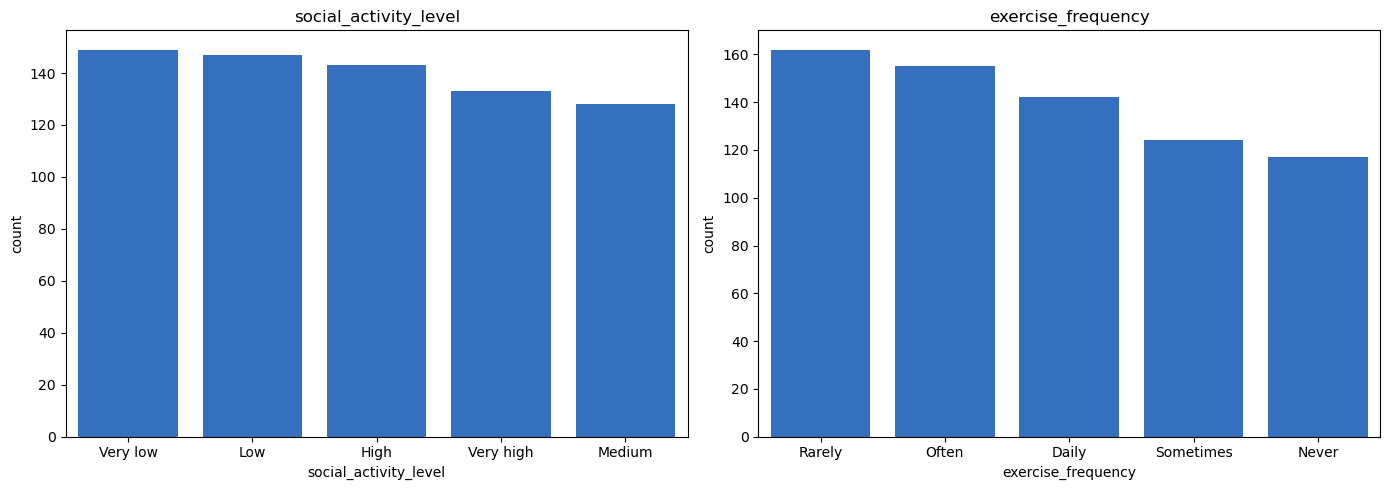

In [41]:
fig,axes=plt.subplots(1,2,figsize=(14,5))

for i,var in enumerate(cat_cols[3:5]):
    counts=X_train_imputed[var].value_counts().reset_index()
    counts.columns=[var,'count']
    sns.barplot(y='count',x=var,color="#1e6cd5",data=counts,ax=axes[i])
    axes[i].set_title(var)

plt.tight_layout()
plt.show()

#### Yes--->1 and No--->0 for meditation or mindfulness
#### Rarely--->3,Often--->2,Sometimes--->4,Daily--->0,Never--->1 for Exercise Frequency

#### **Bivariate Analysis**

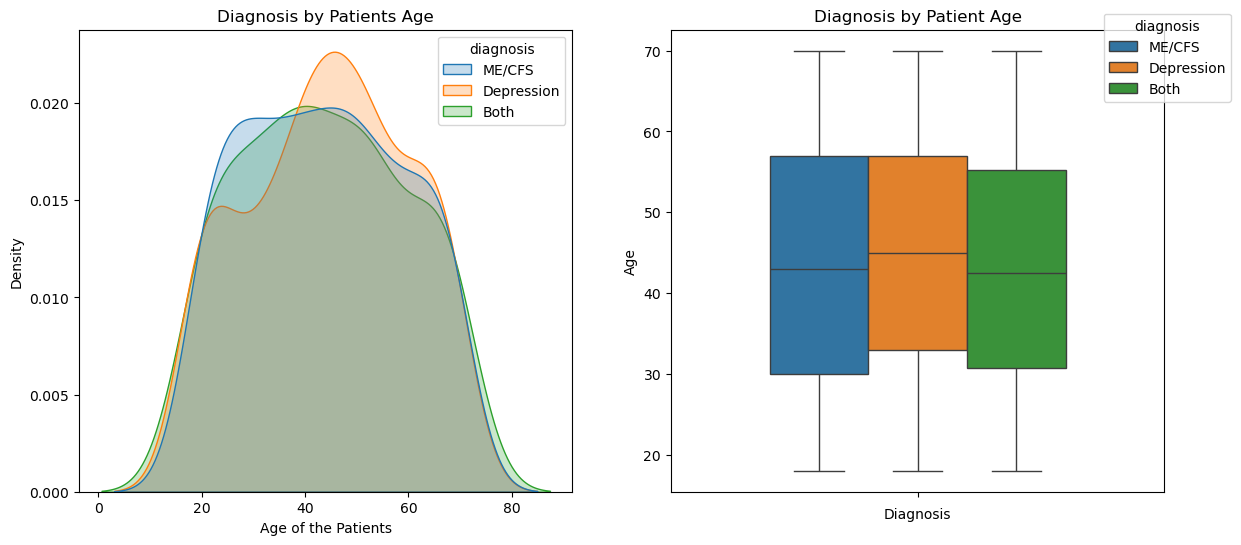

In [42]:
 ### How affect diagnosis for age of the individuals
fig,axes=plt.subplots(1,2,figsize=(14,6))

sns.kdeplot(x="age",data=train_data,hue="diagnosis",common_norm=False,fill=True,ax=axes[0])

axes[0].set_title("Diagnosis by Patients Age")
axes[0].set_xlabel("Age of the Patients")
axes[0].set_ylabel("Density")

sns.boxplot(y="age",data=train_data,hue="diagnosis",width=0.6,ax=axes[1])

axes[1].set_xlabel("Diagnosis")
axes[1].set_ylabel("Age")
axes[1].set_title("Diagnosis by Patient Age")
plt.legend(title="diagnosis", loc='upper right', bbox_to_anchor=(1.15, 1.05))
plt.show()

In [43]:
### calculate the mdeian age of the each diagnosis
ME_CFS_age=train_data[train_data["diagnosis"]=="ME/CFS"][['age']].median()
depression_age=train_data[train_data["diagnosis"]=="Depression"][['age']].median()
both_age=train_data[train_data["diagnosis"]=="Both"][['age']].median()

print(f"Median Age of the ME/CFS Patients:{ME_CFS_age.iloc[0]}")
print(f"Median Age of the Depression Patients:{depression_age.iloc[0]}")
print(f"Median Age of the Both condiations Patients:{both_age.iloc[0]}")

Median Age of the ME/CFS Patients:43.0
Median Age of the Depression Patients:45.0
Median Age of the Both condiations Patients:42.5


In [44]:
## Most of the patients have this three conditions approximately in ealry adulthood not in the childhood or the elderly.
## ME/CFS can begin at a wide range of ages, but the average onset is in early adulthood. 
### For instance, NIH reports the average age of ME/CFS onset is about 33 years.
##link:https://www.ncbi.nlm.nih.gov/books/NBK284897/#:~:text=average%20age%20of%20onset%20is,59%20Reynolds%20et%20al
### Depression also most often begins in early adulthood – large studies report a median onset around age 31.
###link:https://ourworldindata.org/depression-age-of-onset#:~:text=As%20the%20data%20shows%2C%20on,before%20the%20age%20of%2046

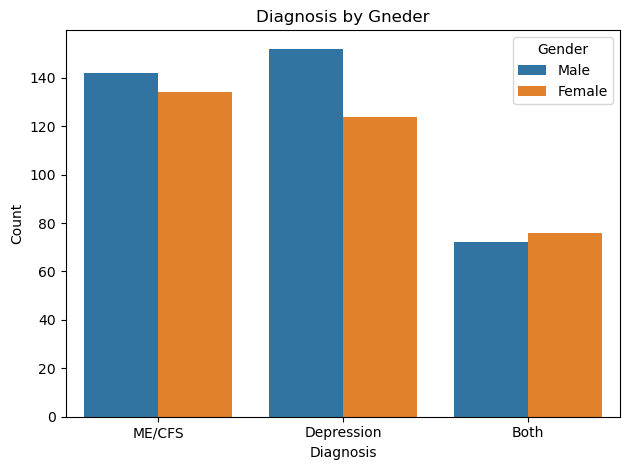

In [45]:
## How Gender effect this Diagnosis

sns.countplot(x="diagnosis",data=train_data,hue="gender")

plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Diagnosis by Gneder")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [46]:
### cross tabulation(summary statistics)
cross_tab=pd.crosstab(train_data["diagnosis"],train_data["gender"])
cross_tab

gender,Female,Male
diagnosis,,
Both,76,72
Depression,124,152
ME/CFS,134,142


In [47]:
## Females representing the higher number of counts in Both conditions, 
## whereas the mlaes reprenting the higher number of counts in each diagnosis(ME/CFS or Depression).
## However when we compare with in real world clinical details,
## ME/CFS has a strong female predominance: about 2–4 women for every man are affected.
## link:https://www.ncbi.nlm.nih.gov/books/NBK284897/#:~:text=average%20age%20of%20onset%20is,59%20Reynolds%20et%20al
## Depression also occurs more often in women. For example, Mayo Clinic notes that about twice as many women as men experience major depression.
## link:https://www.mayoclinic.org/diseases-conditions/depression/in-depth/depression/art-20047725#:~:text=About%20twice%20as%20many%20women,a%20woman%27s%20risk%20of%20depression
## Because both disorders are more common in females, gender alone doesn’t rule one out. 
## However,the female-to-male ratio is usually even higher in ME/CFS (often cited ~3:1 or more) than in depression (~2:1).
## This reflects hormonal and social factors, but clinicians still see many men with both conditions.

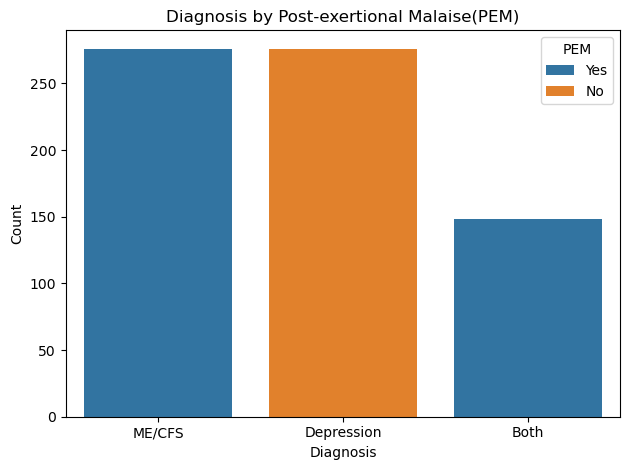

In [48]:
## How PEM(post-exertional malaise) effect in Diagnosis

sns.countplot(x="diagnosis",data=train_data,hue="pem_present")

plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Diagnosis by Post-exertional Malaise(PEM)")
plt.legend(title="PEM")
plt.tight_layout()
plt.show()

In [49]:
### cross tabilation
cross_tab=pd.crosstab(train_data["diagnosis"],train_data["pem_present"])
cross_tab

pem_present,No,Yes
diagnosis,,
Both,0,148
Depression,276,0
ME/CFS,0,276


In [50]:
## According to our data all the MF/CFS patients have post-exertional malaise whereas the,
## non of the depression patients do not indicate the any post-exertional malaise.
## In addtion, 148 patients holds the both conditions indicate present of PEM.
## We believe the reason for this situation,in post-exertional malaise highly affect with patients those who have ME/CFS.
## In real world clinical reports also indicates the similer conditions for instance;
## Almost all ME/CFS patients will answer “Yes” to PEM presence. 
## In contrast, major depression does not involve PEM; exertion does not cause a delayed multi-day crash in depression.
## link:https://www.cdc.gov/me-cfs/hcp/clinical-overview/index.html#:~:text=1,Unrefreshing%20sleep


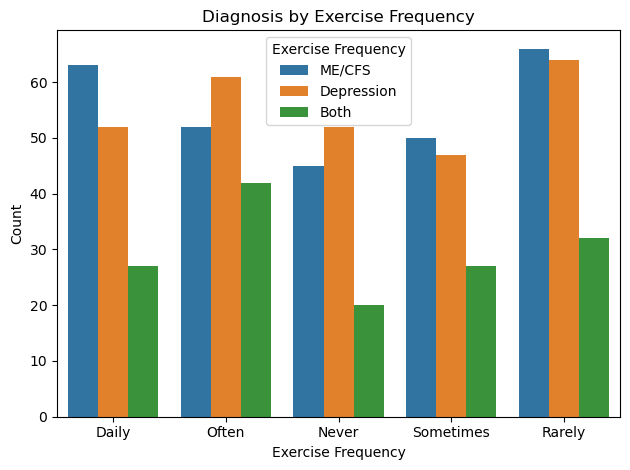

In [51]:
## How Exercise Frequency effect with Diagnosis

sns.countplot(x="exercise_frequency",data=train_data,hue="diagnosis")

plt.xlabel("Exercise Frequency")
plt.ylabel("Count")
plt.title("Diagnosis by Exercise Frequency")
plt.legend(title="Exercise Frequency")
plt.tight_layout()
plt.show()

In [52]:
## cross tabulation
cross_tab=pd.crosstab(train_data["exercise_frequency"],train_data["diagnosis"])
cross_tab

diagnosis,Both,Depression,ME/CFS
exercise_frequency,,,
Daily,27,52,63
Never,20,52,45
Often,42,61,52
Rarely,32,64,66
Sometimes,27,47,50


In [53]:
## According to the historical data,those who have ME/CSF they do not egage the physical exercise 
## due to the recommendation of the doctors or may be they feel when they engage the physiscal activities so tired.
## That means post-exertional malaise conditions is higher of this patients.
## But those who have depression they often engage the physical activities due to the mantain their mentality in good range.
## In fact, CDC guidance warns that routine exercise (especially intense aerobic exercise) is contraindicated in ME/CFS patients because it can trigger PEM.
## link:https://www.cdc.gov/me-cfs/hcp/clinical-overview/index.html#:~:text=1,Unrefreshing%20sleep
## Depressed patients are also often less active, but not because exercise worsens their symptoms; 
## in fact, regular exercise is often recommended as an effective adjunctive treatment for depression. 
## Clinical reviews conclude that “structured exercise has shown promise in alleviating symptoms of clinical depression.
## link:https://pmc.ncbi.nlm.nih.gov/articles/PMC474733/#:~:text=Involvement%20in%20structured%20exercise%20has,28%20Further%2C%20a%20relationship


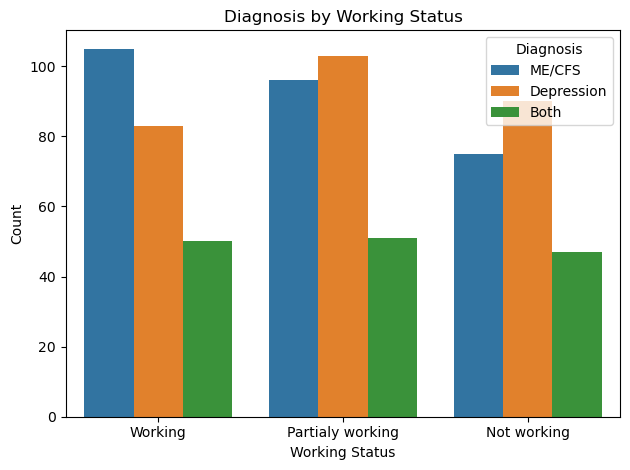

In [54]:
## How Work Status effect with Diagnosis

sns.countplot(x="work_status",data=train_data,hue="diagnosis")

plt.xlabel("Working Status")
plt.ylabel("Count")
plt.title("Diagnosis by Working Status")
plt.legend(title="Diagnosis")
plt.tight_layout()
plt.show()

In [55]:
## cross tabulation
cross_tab=pd.crosstab(train_data["work_status"],train_data["diagnosis"])
cross_tab

diagnosis,Both,Depression,ME/CFS
work_status,,,
Not working,47,90,75
Partialy working,51,103,96
Working,50,83,105


In [56]:
## The bar chart illustrates the distribution of ME/CFS and Depression diagnoses across different working status categories. 
## According to our clinical dataset, patients diagnosed with ME/CFS are more frequently observed in the "Working" category,
## with comparatively fewer cases in the "Partially working" and "Not working" groups. 
## Conversely, patients with Depression are more concentrated in the "Partially working" and "Not working" categories, 
## indicating greater work impairment.

## However,This clinical records slightly contradict with the real world clinical details.
## For instance,Studies show that a large fraction of ME/CFS patients are unable to maintain employment. For example, 
## reviews have found unemployment rates among CFS patients ranging from roughly 35–69% reflecting the disability caused by fatigue and PEM.
## link:https://pmc.ncbi.nlm.nih.gov/articles/PMC474733/#:~:text=Depression%20affects%20roughly%209.5,rate%20of%20outpatient%20treatment%20for
## In depression, work impairment also occurs (depression is a leading cause of lost work productivity)
## but many people with depression remain in the workforce or are able to work part-time with treatment.
## link:https://pmc.ncbi.nlm.nih.gov/articles/PMC474733/#:~:text=Depression%20affects%20roughly%209.5,rate%20of%20outpatient%20treatment%20for.

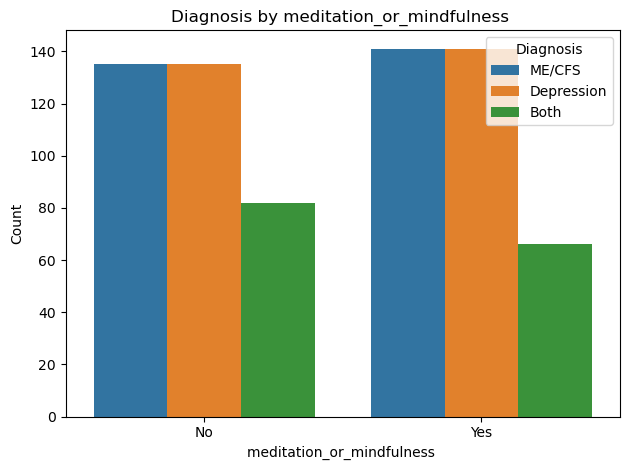

In [57]:
## How meditation_or_mindfulness effect with Diagnosis

sns.countplot(x="meditation_or_mindfulness",data=train_data,hue="diagnosis")

plt.xlabel("meditation_or_mindfulness ")
plt.ylabel("Count")
plt.title("Diagnosis by meditation_or_mindfulness ")
plt.legend(title="Diagnosis")
plt.tight_layout()
plt.show()

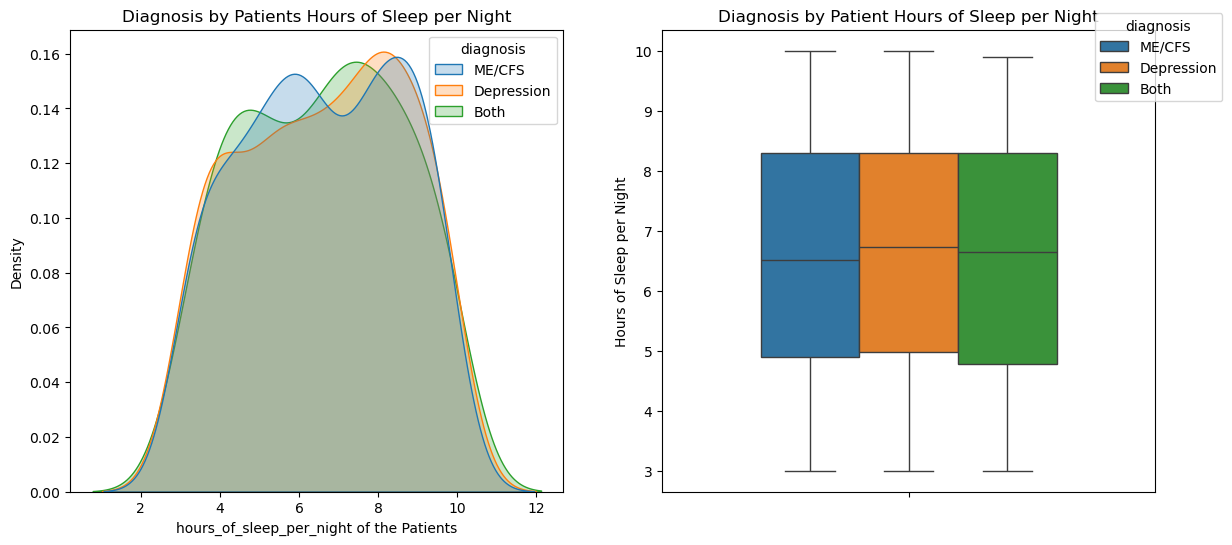

In [58]:
## How patient sleep pattern effect with the diagnosis
fig,axes=plt.subplots(1,2,figsize=(14,6))

sns.kdeplot(x="hours_of_sleep_per_night",data=train_data,hue="diagnosis",common_norm=False,fill=True,ax=axes[0])

axes[0].set_title("Diagnosis by Patients Hours of Sleep per Night")
axes[0].set_xlabel("hours_of_sleep_per_night of the Patients")
axes[0].set_ylabel("Density")

sns.boxplot(y="hours_of_sleep_per_night",data=train_data,hue="diagnosis",width=0.6,ax=axes[1])


axes[1].set_ylabel("Hours of Sleep per Night")
axes[1].set_title("Diagnosis by Patient Hours of Sleep per Night")

plt.legend(title="diagnosis", loc='upper right', bbox_to_anchor=(1.15, 1.05))


plt.show()

In [59]:
### calculate the mdeian hours of sleep in the night of the each diagnosis
ME_CFS_sleep=train_data[train_data["diagnosis"]=="ME/CFS"][['hours_of_sleep_per_night']].median()
depression_sleep=train_data[train_data["diagnosis"]=="Depression"][['hours_of_sleep_per_night']].median()
both_sleep=train_data[train_data["diagnosis"]=="Both"][['hours_of_sleep_per_night']].median()

print(f"Median Hours sleep of the ME/CFS Patients:{ME_CFS_sleep.iloc[0]}")
print(f"Median Hours sleep of the Depression Patients:{depression_sleep.iloc[0]}")
print(f"Median Hours sleep of the Both condiations Patients:{both_sleep.iloc[0]}")

Median Hours sleep of the ME/CFS Patients:6.503
Median Hours sleep of the Depression Patients:6.721
Median Hours sleep of the Both condiations Patients:6.65


In [60]:
## Accoding to the our clinical data records,above box plots show the median sleep hours of each diagnosis are approximately same.
## And also distribution of each diagnosis is approximately same.Suggesting these findings highlight the potential 
## gap between recorded diagnosis data and real-world disease impact.For instance;

## Sleep studies note that ME/CFS patients can have extended total sleep times, but the sleep is non-restorativ.
## link:https://pmc.ncbi.nlm.nih.gov/articles/PMC3501671/#:~:text=difficulties%2C%20muscle%20pain%2C%20headaches%2C%20tender,difficulty%20falling%20asleep%20and%20disturbed
## Depression, on the other hand, can go either way: many depressed patients suffer insomnia and sleep only a few hours (often waking early),
## while about 15% experience hypersomnia (sleeping much longer than normal).
## link:https://www.sleepfoundation.org/mental-health/depression-and-sleep#:~:text=Depression%20and%20Insomnia.


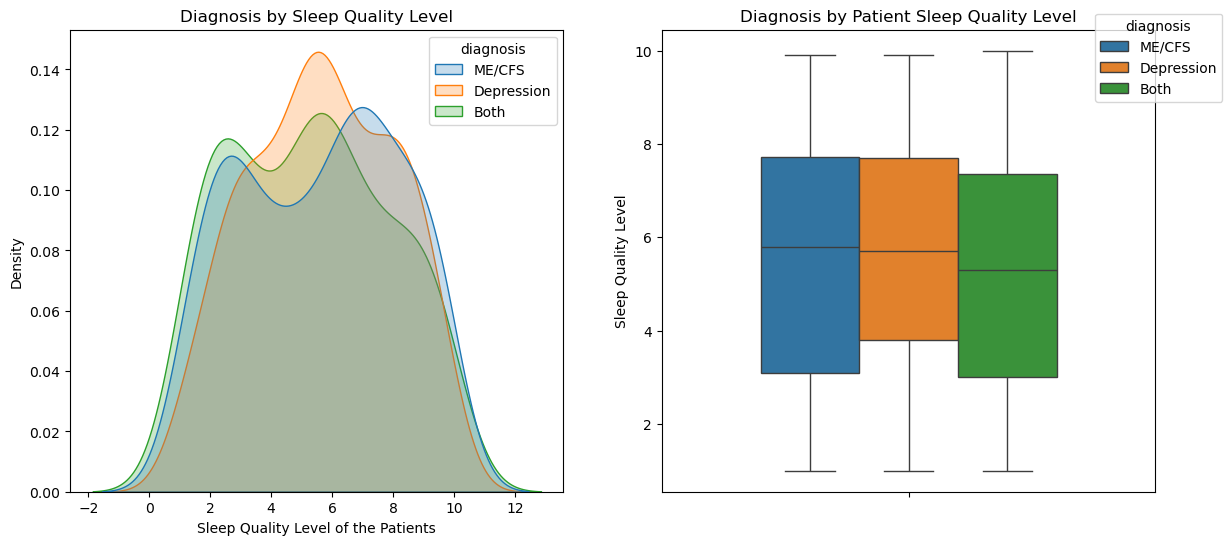

In [61]:
### How affect diagnosis for sleep_quality_index of the individuals
fig,axes=plt.subplots(1,2,figsize=(14,6))

sns.kdeplot(x="sleep_quality_index",data=train_data,hue="diagnosis",common_norm=False,fill=True,ax=axes[0])

axes[0].set_title("Diagnosis by Sleep Quality Level")
axes[0].set_xlabel("Sleep Quality Level of the Patients")
axes[0].set_ylabel("Density")

sns.boxplot(y="sleep_quality_index",data=train_data,hue="diagnosis",width=0.6,ax=axes[1])


axes[1].set_ylabel("Sleep Quality Level")
axes[1].set_title("Diagnosis by Patient Sleep Quality Level")

plt.legend(title="diagnosis", loc='upper right', bbox_to_anchor=(1.15, 1.05))


plt.show()


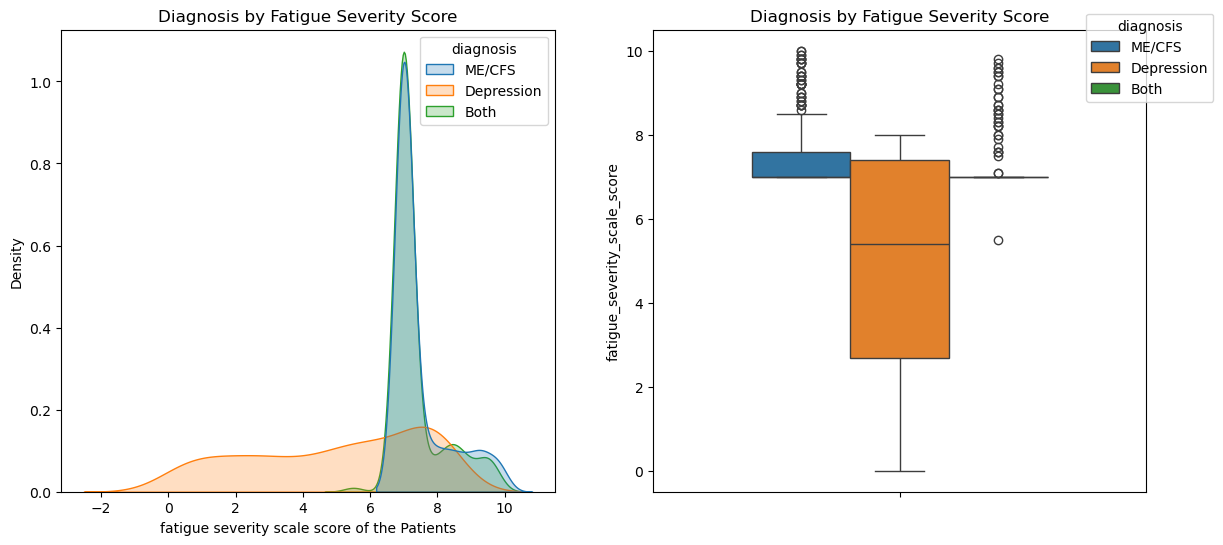

In [62]:
### How affect diagnosis for fatigue_severity_scale_score of the individuals

fig,axes=plt.subplots(1,2,figsize=(14,6))

sns.kdeplot(x="fatigue_severity_scale_score",data=train_data,hue="diagnosis",common_norm=False,fill=True,ax=axes[0])

axes[0].set_title("Diagnosis by Fatigue Severity Score")
axes[0].set_xlabel("fatigue severity scale score of the Patients")
axes[0].set_ylabel("Density")

sns.boxplot(y="fatigue_severity_scale_score",data=train_data,hue="diagnosis",width=0.6,ax=axes[1])


axes[1].set_ylabel("fatigue_severity_scale_score")
axes[1].set_title("Diagnosis by Fatigue Severity Score")

plt.legend(title="diagnosis", loc='upper right', bbox_to_anchor=(1.15, 1.05))


plt.show()

In [63]:
### calculate the mdeian fatigue_severity_scale_score of the each diagnosis
ME_CFS_fatigue=train_data[train_data["diagnosis"]=="ME/CFS"][['fatigue_severity_scale_score']].median()
depression_fatigue=train_data[train_data["diagnosis"]=="Depression"][['fatigue_severity_scale_score']].median()
both_fatigue=train_data[train_data["diagnosis"]=="Both"][['fatigue_severity_scale_score']].median()

print(f"Median fatigue_severity_score of the ME/CFS Patients:{ME_CFS_fatigue.iloc[0]}")
print(f"Median fatigue_severity_score of the Depression Patients:{depression_fatigue.iloc[0]}")
print(f"Median fatigue_severity_score Both condiations Patients:{both_fatigue.iloc[0]}")

Median fatigue_severity_score of the ME/CFS Patients:7.0
Median fatigue_severity_score of the Depression Patients:5.4
Median fatigue_severity_score Both condiations Patients:7.0


In [64]:
## The above box plot illustrate the higher median fatigue severity score for ME/CFS patients and Both conditions holds patients.
## whereas low median fatigue severity score for depression patients.This results slightly compatiable with the real clinical records.

## Extreme fatigue is a core feature in ME/CFS (100% of cases) whereas in depression fatigue is common (~90% of patients) but usually 
## accompanies the primary emotional symptoms rather than standing alone.
## link:https://www.cdc.gov/me-cfs/hcp/clinical-overview/index.html#:~:text=1,Unrefreshing%20sleep
## link:https://www.thesupportivecare.com/blog/the-connection-between-depression-and-chronic-fatigue#:~:text=Depression%20and%20chronic%20fatigue%20share,difficultiesCommonCommonReduced%20interest%20in%20activitiesDefining%20symptomOften


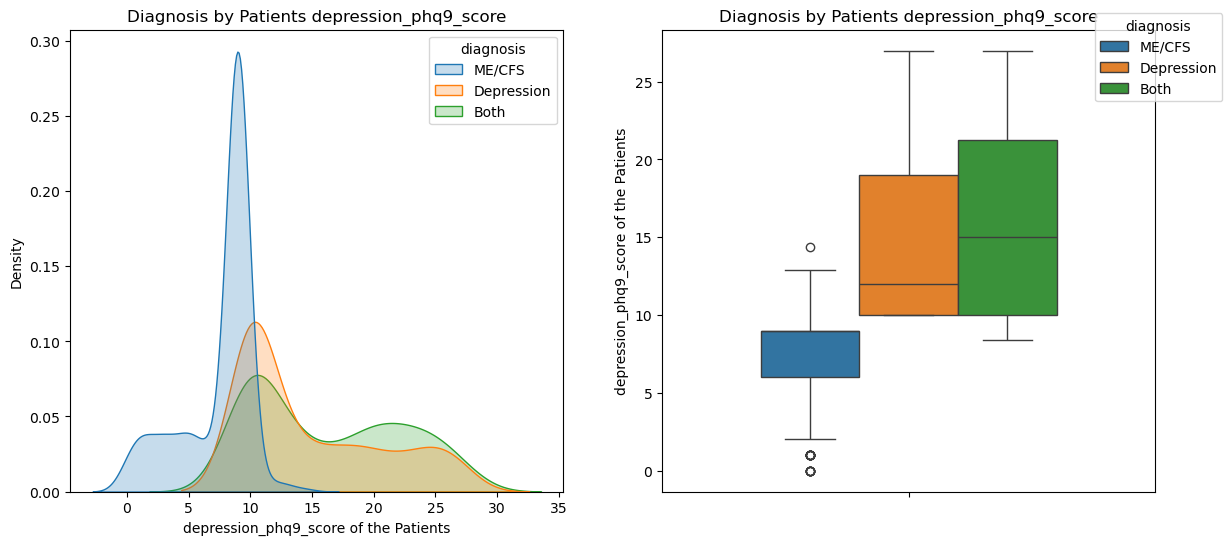

In [65]:
### How affect diagnosis for depression_phq9_score of the individuals
fig,axes=plt.subplots(1,2,figsize=(14,6))

sns.kdeplot(x="depression_phq9_score",data=train_data,hue="diagnosis",common_norm=False,fill=True,ax=axes[0])

axes[0].set_title("Diagnosis by Patients depression_phq9_score")
axes[0].set_xlabel("depression_phq9_score of the Patients")
axes[0].set_ylabel("Density")

sns.boxplot(y="depression_phq9_score",data=train_data,hue="diagnosis",width=0.6,ax=axes[1])


axes[1].set_ylabel("depression_phq9_score of the Patients")
axes[1].set_title("Diagnosis by Patients depression_phq9_score")

plt.legend(title="diagnosis", loc='upper right', bbox_to_anchor=(1.15, 1.05))


plt.show()

Several studies report frequent comorbid depression in ME/CFS. https://pubmed.ncbi.nlm.nih.gov/23619200/?utm_source=chatgpt.com
In patients with ME/CFS and depression, CBT outcomes differ: depressive symptoms linked to poorer responses in internet-based CBT. https://pubmed.ncbi.nlm.nih.gov/38970879/?utm_source=chatgpt.com

Katon et al. (2001): Patients with chronic fatigue and comorbid depression had double the PHQ-9 scores of ME/CFS-only patients.

Lattie et al. (2012): PHQ‑9 inflation is common in ME/CFS due to somatic symptom overlap.

CDC and NIH recognize that fatigue from ME/CFS and depression can look similar, but only a subset of ME/CFS patients meet clinical criteria for major depression.


Jason et al. (2011): ME/CFS patients scored significantly higher on FSS than depression-only or healthy controls.
Viner & Christie (2005): Adolescents with ME/CFS report high fatigue and school dropouts. Depression symptoms overlap but don’t account for all fatigue.
Wessely et al.: Those with both diagnoses reported highest functional impairment, showing fatigue is compounded by dual pathology.


#### **Multivariate Analysis**

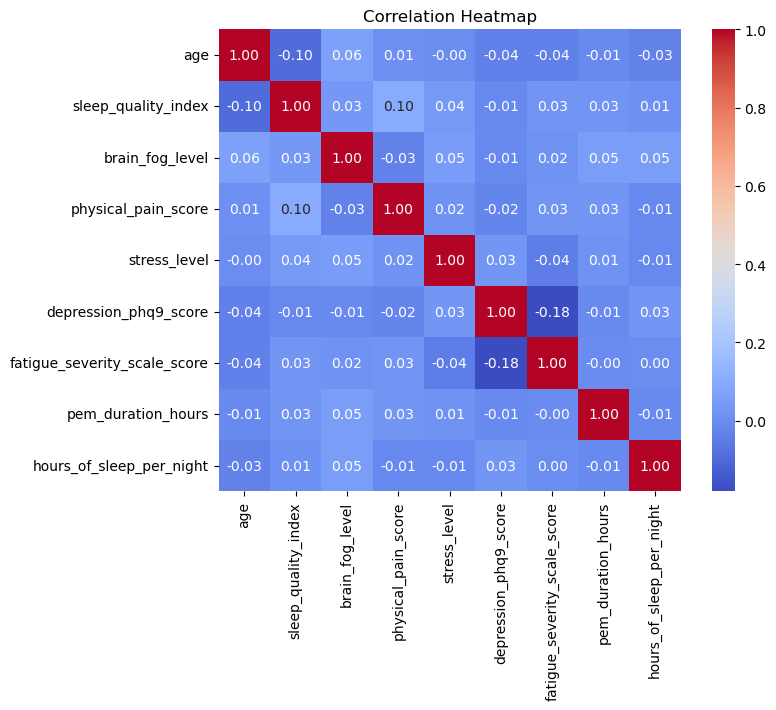

In [66]:
# Calculate correlation matrix
corr = train_data.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Add title
plt.title('Correlation Heatmap')

# Show plot
plt.show()

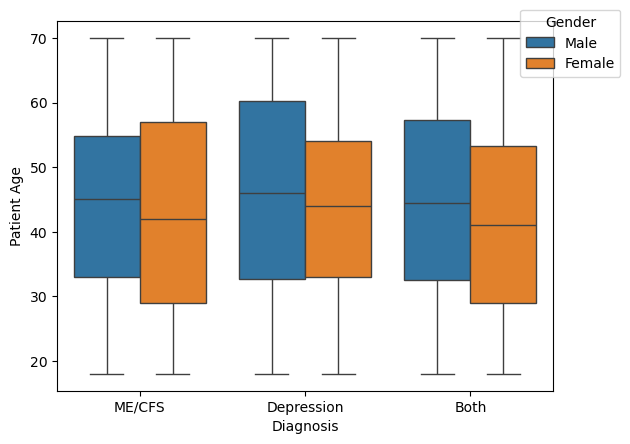

In [67]:
sns.boxplot(data=train_data, x="diagnosis", y="age", hue="gender")

plt.xlabel("Diagnosis")
plt.ylabel("Patient Age")
plt.legend(title="Gender", loc='upper right', bbox_to_anchor=(1.15, 1.05))
plt.show()

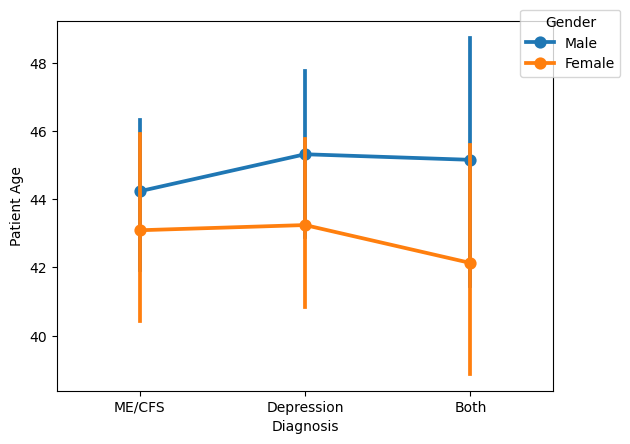

In [68]:
sns.pointplot(data=train_data, x="diagnosis", y="age", hue="gender")
plt.xlabel("Diagnosis")
plt.ylabel("Patient Age")
plt.legend(title="Gender", loc='upper right', bbox_to_anchor=(1.15, 1.05))
plt.show()

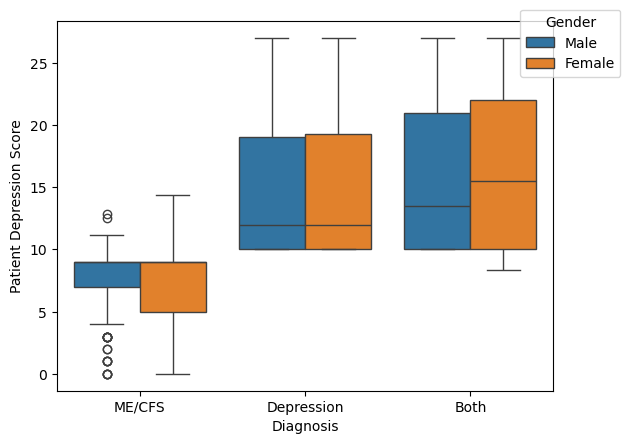

In [69]:
sns.boxplot(data=train_data, x="diagnosis", y="depression_phq9_score", hue="gender")

plt.xlabel("Diagnosis")
plt.ylabel("Patient Depression Score")
plt.legend(title="Gender", loc='upper right', bbox_to_anchor=(1.15, 1.05))
plt.show()

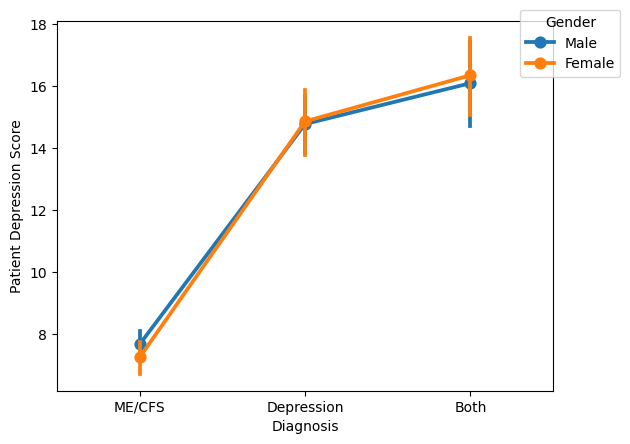

In [70]:
sns.pointplot(data=train_data, x="diagnosis", y="depression_phq9_score", hue="gender")
plt.xlabel("Diagnosis")
plt.ylabel("Patient Depression Score")
plt.legend(title="Gender", loc='upper right', bbox_to_anchor=(1.15, 1.05))
plt.show()

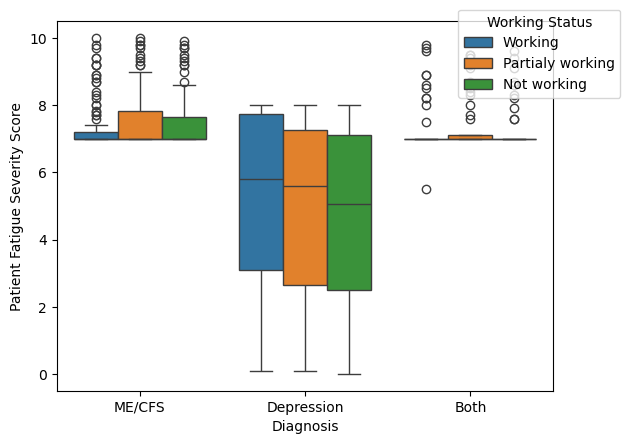

In [71]:
sns.boxplot(data=train_data, x="diagnosis", y="fatigue_severity_scale_score", hue="work_status")

plt.xlabel("Diagnosis")
plt.ylabel("Patient Fatigue Severity Score")
plt.legend(title="Working Status", loc='upper right', bbox_to_anchor=(1.15, 1.05))
plt.show()

In [72]:
### check multicolinerity of the variables
# Assume X is your features DataFrame (numerical only)
X = train_data[num_cols]  # use only numeric predictors
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                        feature        VIF
0                         const  56.999308
1                           age   1.018304
2           sleep_quality_index   1.023812
3               brain_fog_level   1.014383
4           physical_pain_score   1.013878
5                  stress_level   1.006691
6         depression_phq9_score   1.037509
7  fatigue_severity_scale_score   1.039011
8            pem_duration_hours   1.004082
9      hours_of_sleep_per_night   1.005022


In [73]:
## All the numeric varaibles indicate the low multicolinerity score which is less than the bench mark.

In [74]:
### Multivariate Normality check using mardia's test
X=X.drop(["const"],axis=1)
# Mardia's multivariate normality test
pg.multivariate_normality(X, alpha=0.05)

## multivariate normality assumption is false

HZResults(hz=1.276566731348312, pval=1.9117134309153278e-107, normal=False)

In [75]:
## Multivaraite outliers check using Robust Mahalnobius Distance
robust_cov = MinCovDet().fit(X)

# Compute Robust Mahalanobis Distances
mahal_rmd = robust_cov.mahalanobis(X)
# Use 99% confidence interval
threshold = chi2.ppf(0.99, df=X.shape[1])

# Identify outliers
outliers = np.where(mahal_rmd > threshold)[0]
print("Number of Multivariate Outliers:", len(outliers))

Number of Multivariate Outliers: 227


## **FAMD**

In [76]:
## Scale all the numerical varaibles before performing the famd
scaler=StandardScaler() ##define the object
X_train_imputed[num_cols]=scaler.fit_transform(X_train_imputed[num_cols]) ## fit and transform the train set

In [77]:
famd=FAMD(n_components=15,random_state=42) ## Initilization FAMD
famd_result=famd.fit_transform(X_train_imputed) ##fit and transform the predictor varaibles

print(famd_result) ## print the first five component whihc is given by the FAMD

component        0         1         2         3         4         5   \
0         -2.735220 -1.528841 -2.018052  1.491136  3.184133  0.599269   
1          2.602139 -1.759190 -1.412183  2.881064 -2.512071  1.425597   
2          3.425607 -1.506867  2.981117 -1.391845 -1.176060 -1.752414   
3         -0.716083  3.004073  0.324794 -0.061458 -0.892246 -2.331168   
4         -1.771498  0.717208 -0.260569  0.292304 -0.327863 -0.704288   
..              ...       ...       ...       ...       ...       ...   
695        3.056284  1.211690 -0.871987 -1.836587  0.361867  3.467490   
696        2.936854 -0.985395 -0.209402  0.066060  2.808967 -1.874426   
697       -1.009799  1.909296  2.703281 -0.262843  0.456071 -4.400961   
698       -3.280314 -0.239770  0.613744  3.544879 -0.081239  0.812140   
699       -1.593419 -1.125563  0.673090 -1.414596  2.926664  3.251596   

component        6         7         8         9         10        11  \
0         -0.452209  1.537733 -0.083094  2.057210 

In [78]:
famd.percentage_of_variance_ ## percentage of variability explain by the each FAMD component

array([8.1932272 , 7.64988505, 7.06386663, 6.94458881, 6.78833573,
       6.59862347, 6.44318293, 6.18278054, 5.94413979, 5.69065098,
       5.32826387, 5.07310037, 5.0202625 , 2.35037478, 2.24561982])

In [79]:
famd.cumulative_percentage_of_variance_ ## Cumulative variability of the FAMD component

array([ 8.1932272 , 15.84311225, 22.90697888, 29.85156769, 36.63990342,
       43.23852689, 49.68170981, 55.86449036, 61.80863014, 67.49928113,
       72.827545  , 77.90064537, 82.92090786, 85.27128264, 87.51690246])

In [80]:
## plot the first two compnent of the FAMD result
famd.plot(
    X_train_imputed,
    x_component=0,
    y_component=1
)

c:\Users\ASUS\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\ASUS\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

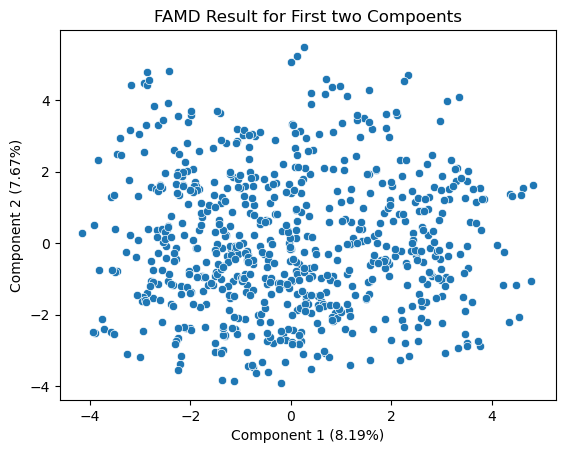

In [81]:
## plot the first two component using scatter plot 
sns.scatterplot(data=famd_result,x=0,y=1)

plt.xlabel("Component 1 (8.19%)")
plt.ylabel("Component 2 (7.67%)")
plt.title("FAMD Result for First two Compoents")
plt.show()

In [82]:
### Multivariate Normality check for the famd results using mardia's test
# Mardia's multivariate normality test
pg.multivariate_normality(famd_result, alpha=0.05)

## multivariate normality assumption is false

HZResults(hz=1.5122829038535373, pval=0.0, normal=False)

## **Analyze the Decision Boundry**

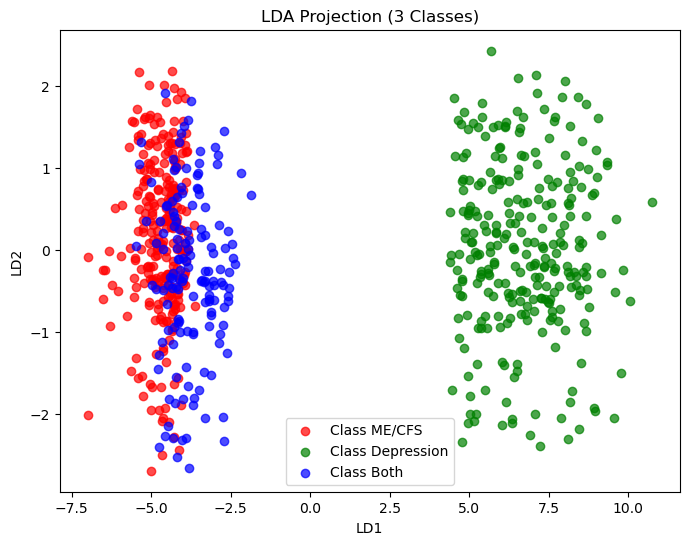

In [83]:
# Initialize LDA
lda = LDA(n_components=2)  

# Fit and Transform
X_lda = lda.fit_transform(famd_result, Y_train)

# Visualization
plt.figure(figsize=(8,6))
for label, color in zip(Y_train.unique(), ['red', 'green', 'blue']):
    plt.scatter(X_lda[Y_train == label, 0], X_lda[Y_train == label, 1],
                label=f'Class {label}', alpha=0.7, color=color)

plt.title('LDA Projection (3 Classes)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

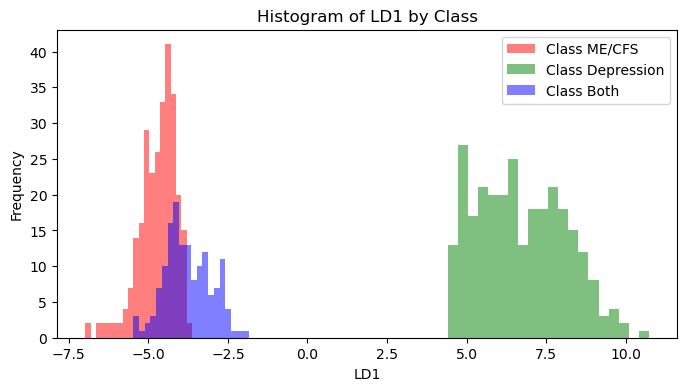

In [84]:
# Plot histogram for LD1
plt.figure(figsize=(8, 4))
for label, color in zip(Y_train.unique(), ['red', 'green', 'blue']):
    plt.hist(X_lda[Y_train == label, 0], alpha=0.5, label=f'Class {label}', color=color, bins=20)
plt.title('Histogram of LD1 by Class')
plt.xlabel('LD1')
plt.ylabel('Frequency')
plt.legend()
plt.show()

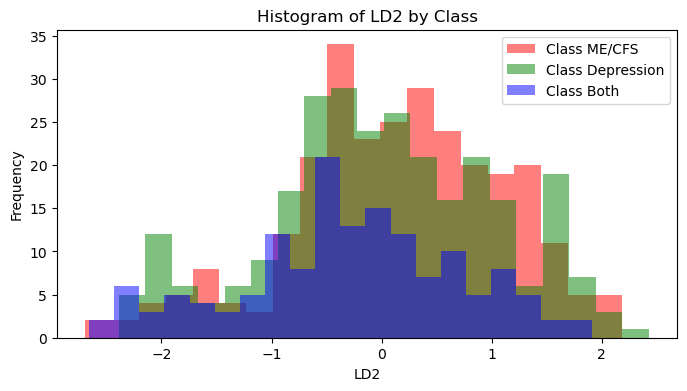

In [85]:
# Plot histogram for LD2
plt.figure(figsize=(8, 4))
for label, color in zip(Y_train.unique(), ['red', 'green', 'blue']):
    plt.hist(X_lda[Y_train == label, 1], alpha=0.5, label=f'Class {label}', color=color, bins=20)
plt.title('Histogram of LD2 by Class')
plt.xlabel('LD2')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## **Outlier Detection**

In [86]:
is_outlier = mahal_rmd > threshold

# Add outlier flag to FAMD result
famd_result["is_outlier"] = is_outlier

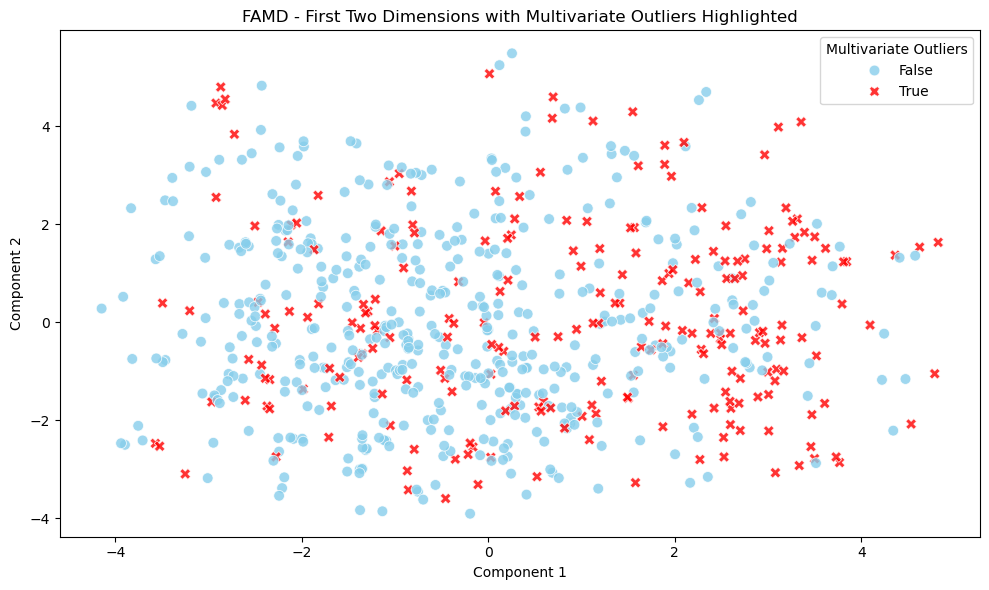

In [87]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=famd_result,
    x=0, y=1,
    hue="is_outlier",
    palette={False: "skyblue", True: "red"},
    style="is_outlier",
    s=60,
    alpha=0.8
)

plt.title("FAMD - First Two Dimensions with Multivariate Outliers Highlighted")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Multivariate Outliers")
plt.tight_layout()
plt.show()

In [88]:
### combine Y_test and X_test_imputed 
test_data = pd.concat([Y_test.reset_index(drop=True), pd.DataFrame(X_test_imputed)], axis=1)

In [91]:
## save the test data and train data
test_data.to_csv("C:\\UOC pdf\\4th Year\\Machine Learning-02\\Data-Analysis-Project-2\\data\\test_data.csv")
train_data.to_csv("C:\\UOC pdf\\4th Year\\Machine Learning-02\\Data-Analysis-Project-2\\data\\train_data.csv")

## **End of the EDA**